In [1]:
# we import the main modules needed to create the racing bar chart using pandas, numpy and matplotlib.

import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [2]:
# it's always a good idea to take a look at the head of a data set after making it into a 
# dataframe to visualize what we are seeing.
df = pd.read_csv('dataset.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
# we keep only essential columns and drop the ones we don't need.
df = df[["ObservationDate","Province/State","Country/Region","Confirmed","Deaths","Recovered"]]

In [4]:
# what I did here is manipulate the original dataframe using the groupby function, which selects the country/region
# column and then groups it by Observation date so that the country/regions are placed together.
grouped_df = df.groupby(['Country/Region','ObservationDate'])
# now here, we sum up the columns for confirmed/deaths/recovered as this sum each date will define our bar chart.
# then i reset the index in order to observe the value/level of the row, and then sort the overall dataframe by
#observation date - this is the latest date, which is why we set ascending=false. 
df2 = grouped_df.sum().reset_index().sort_values(['ObservationDate'],ascending=False)
df2.head()

Country/Region ObservationDate  Confirmed  Deaths  Recovered
11448      Mauritius      06/12/2020      337.0    10.0      325.0
8137            Iran      06/12/2020   182525.0  8659.0   144649.0
17852         Turkey      06/12/2020   175218.0  4778.0   149102.0
8022       Indonesia      06/12/2020    36406.0  2048.0    13213.0
3091        Cambodia      06/12/2020      126.0     0.0      125.0

In [5]:
#now that we have our goal dataframe in terms of showing the information we want and in the way we want, we must
#consider the creation of the animated bar chart. Keep in mind that the bar chart will display each date's cases in 
#frames as the dates advance and country cases change. Let's visualize what the last frame for the latest date, 
# 06/12/2020 will look like.

# to do this, we modify our dataframe just a bit so that the ObservationDate only displays the dates for 06/12/2020 
# and so that the values descend from largest to smallest. Furthermore, we only want the bar chart to display 10
# countries at a time - otherwise, the chart would be too huge to be visually meaningful! 


In [6]:
df3 = (df2[df2['ObservationDate'].eq("06/12/2020")].sort_values(by="Confirmed",ascending=False).head(10))
df3

Country/Region ObservationDate  Confirmed    Deaths  Recovered
18129             US      06/12/2020  2048986.0  114669.0   547386.0
2428          Brazil      06/12/2020   828810.0   41828.0   445123.0
14426         Russia      06/12/2020   510761.0    6705.0   268862.0
7919           India      06/12/2020   297535.0    8498.0   147195.0
17986             UK      06/12/2020   294402.0   41566.0     1282.0
16306          Spain      06/12/2020   243209.0   27136.0   150376.0
8600           Italy      06/12/2020   236305.0   34223.0   173085.0
13715           Peru      06/12/2020   214788.0    6088.0   107133.0
6049          France      06/12/2020   193220.0   29377.0    72695.0
6486         Germany      06/12/2020   187226.0    8783.0   171535.0

Text(0, 0.5, 'Country')

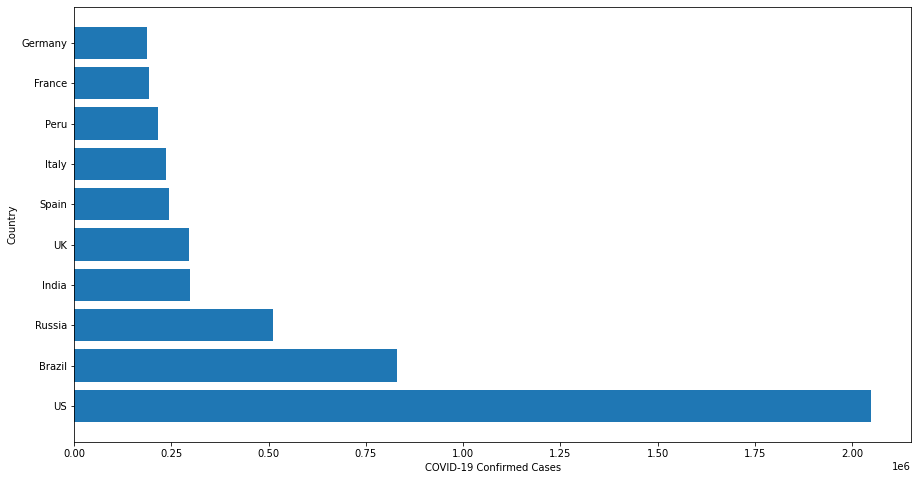

In [7]:
#now, we can make a simple bar graph of the above dataframe using matplotlib. 

#empty subplot
fig, ax = plt.subplots(figsize=(15, 8))
#horizontal bargraph plotting country/region and confirmed only
ax.barh(df3['Country/Region'], df3['Confirmed'])
#label the x and y axis
plt.xlabel('COVID-19 Confirmed Cases')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

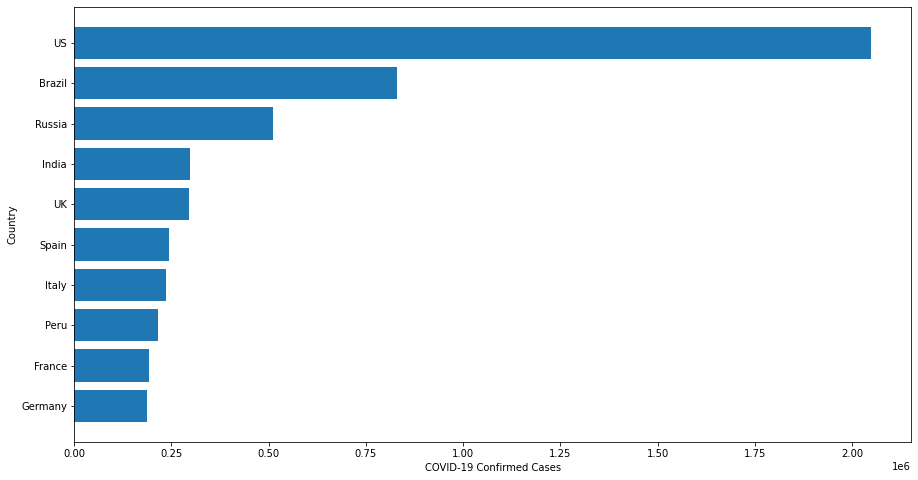

In [8]:
# now, since we want the racing bar chart to show the most confirmed cases at the top as each date passes, we make
# a simple modification to the dataframe that reverses the order of the dataframe

df4=df3[::-1]
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df4['Country/Region'], df4['Confirmed'])
plt.xlabel('COVID-19 Confirmed Cases')
plt.ylabel('Country')

In [37]:
# Here, I created a dictionary called "colors" to define the unique values in the Country/Region column.
colors = dict(zip(df4['Country/Region'].unique(),
                  ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#f7bb5f','#fb6b19','#1fb1fb', '#c5c7a5', '#8b97ad', '#a39ba2'] * 31))

Text(1, 0.4, '06/12/2020')

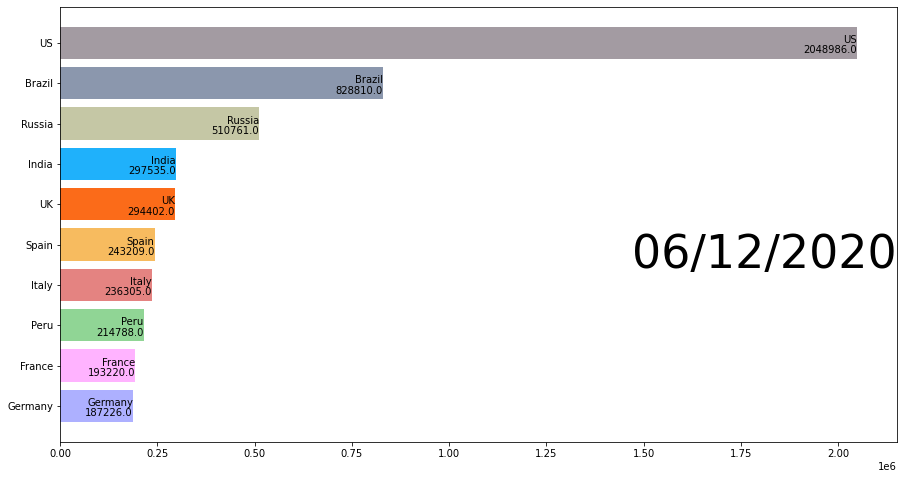

In [38]:
# empty subplot
fig, ax = plt.subplots(figsize=(15, 8))
# Here, I was able to implement the dict colors values to the color attribute:
ax.barh(df4['Country/Region'], df4['Confirmed'], color=[colors[x] for x in df4['Country/Region']])
# Now, using a forloop piece of code, we can create an iteration over the column values in order to plot the country/region values aka names and the confirmed case values. 
for i, (value, name) in enumerate(zip(df4['Confirmed'], df4['Country/Region'])):
    ax.text(value, i,     name,                 ha='right')  # name here is the name of the country - country value
    ax.text(value, i-0.25,     value,           ha='right')   # value here is the confirmed # of cases
    

ax.text(1, 0.4, "06/12/2020", transform=ax.transAxes, size=46, ha='right')

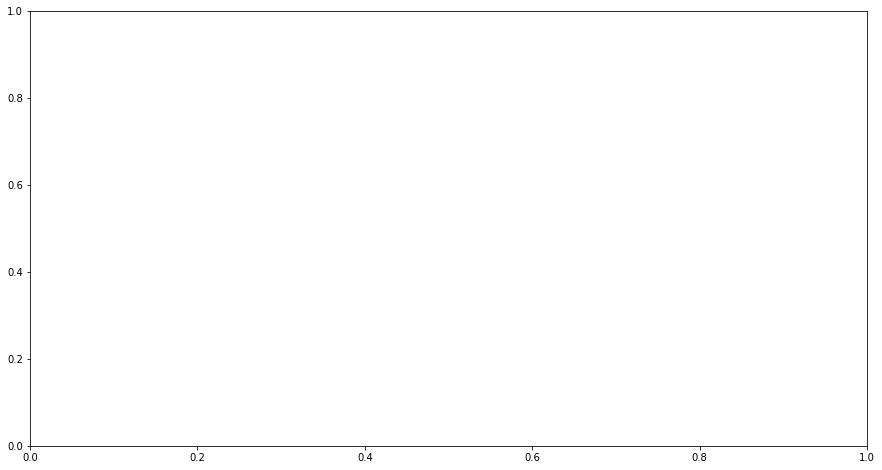

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(date,case="Deaths"):
    df4= (df2[df2['ObservationDate'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1]
    ax.clear()
    ax.barh(df4['Country/Region'], df4[case], color=['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#f7bb5f','#fb6b19','#1fb1fb', '#c5c7a5', '#8b97ad', '#a39ba2'][::-1])
    dx = df4[case].max() / 200
    for i, (value, name) in enumerate(zip(df4[case], df4['Country/Region'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline')
     
#Cleaning up the graph and making it visually appealing.
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
    ax.text(0, 1.06, 'COVID-19 Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The number of '+str(case)+' Cases up to 12 June 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)


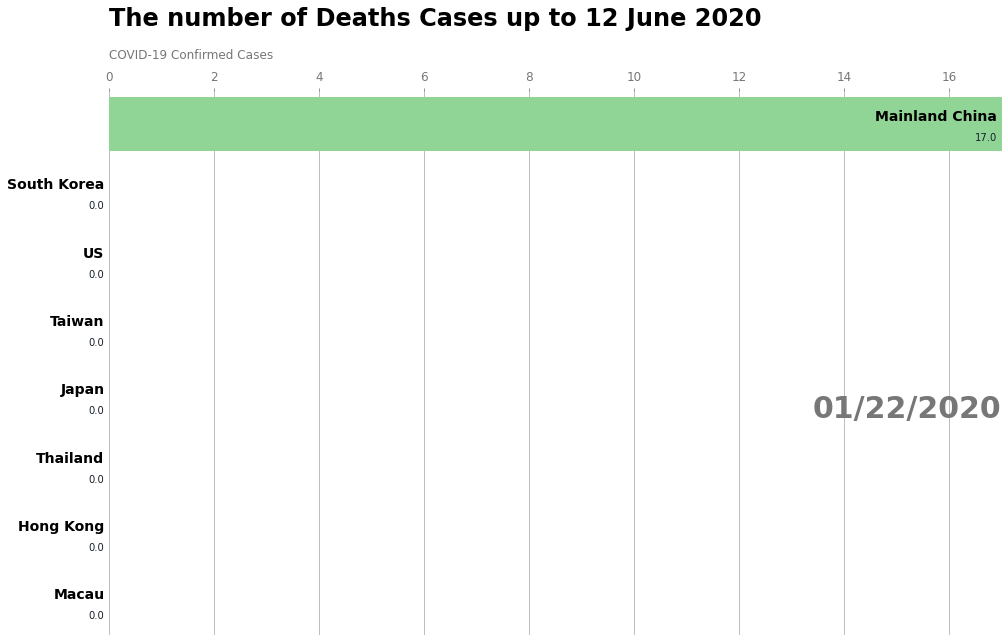

In [42]:
from matplotlib import animation as F
from IPython.display import HTML
fig,ax = plt.subplots(figsize=(16,10)) #Set figure for plot
animator = F.FuncAnimation(fig,draw_barchart,frames=df['ObservationDate'].unique(),interval=300) #Building animation
HTML(animator.to_jshtml())